In [1]:
# this is the pipeline of phenotype analysis
import sys
sys.path.append('..')
import os
import pandas as pd
import GCN
import copy
import vis_function as vf
import FR
import abd_profile
import warnings

In [5]:
# avoid log warning
warnings.filterwarnings('ignore')

ori_profile = abd_profile.input_profile('../data/CRC/CRC1/abd.tsv' , transfer=True)
metadata = pd.read_csv('../data/CRC/CRC1/metadata.tsv', sep='\t', header=0)
selected_raw_profile = ori_profile.loc[list(metadata['sample_id']), :]
GCN_df = GCN.input_GCN('../data/gcn2008.tsv', transfer=True)
crc_profile = abd_profile.check(selected_raw_profile, GCN_df)
# load the distance
d_df = pd.read_csv('../data/sp_d.tsv', sep='\t', header=0, index_col=0)


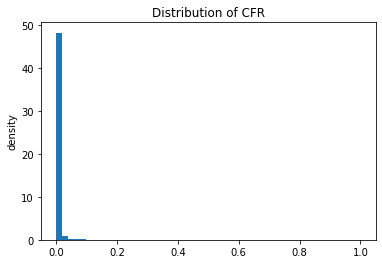

In [6]:
cfr, log_max, log_min = FR.fr_df_without_log(crc_profile, d_df)
vf.fr_frequency(cfr.values, 'Distribution of CFR')

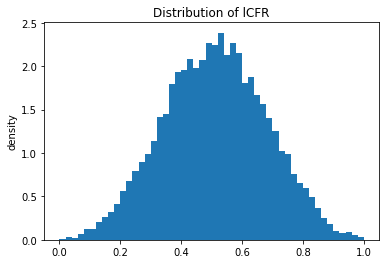

In [7]:
lcfr, log_max, log_min = FR.fr_df(crc_profile, d_df)
vf.fr_frequency(lcfr.values, 'Distribution of lCFR')
